<a href="https://colab.research.google.com/github/HwangSiyeon/ESAA_homework/blob/main/ESAA_11_27_MachineLearningGuide(p_409_427).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 군집화
## K-평균 알고리즘 이해
- K 평균: 군집 중심점(centroid)라는 특정한 임의의 지점을 선택해 해당 중심에 가장 가까운 포인트들을 선택하는 군집화 기법
- 군집 중심점: 선택된 포인트의 평균 지점으로 이동한 후 이동된 중심점에서 다시 가까운 포인트를 선택, 다시 중심점을 평균 지점으로 이동하는 프로세스를 반복적으로 수행. 모든 데이터 포인트에서 더 이상 중심점의 이동이 없을 경우 반복을 멈추고 해당 중시멈에 속하는 데이터 포인트들을 군집화한다.
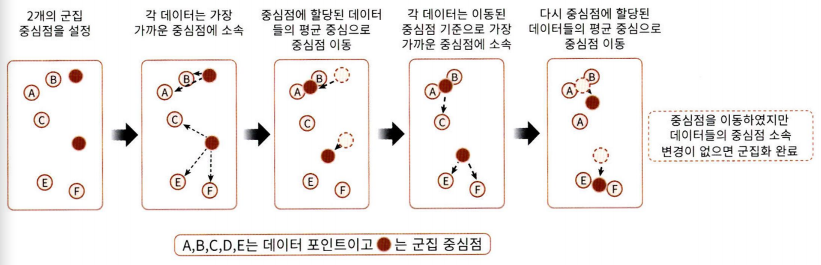

1. 먼저 군집화의 기준이 되는 중심을 구성하려는 군집화 개수만큼 임의의 워치에 가져다 놓습니다. 전체 데이터를 2개로 군집화하려면 2개의 중심을 임의의 위치에 가져다 놓는 것입니다.
(임의의 위치에 군집 중심점을 가져다 놓으면 반복적인 이동 수행을 너무 많이 해서 수행 시간이 오래 걸리기 때문에,초기화 알고리즘으로 적합한 위치에 중심점을 가져다 놓지만, 여기서는 설명을 위해 임의의 위치로 가정하겠습니다)

2. 각 데이터는 가장 가까운 곳에 위치한 중심점에 소속됩니다. 위 그림에서는 A,B 데이터가 같은 중심점에 소속되며, C,E,F 데이터가 같은 중심점에 소속됩니다.

3. 이렇게 소속이 결정되면 군집 중심점을 소속된 데이터의 평균 중심으로 이동합니다. 위 그림에서는 A,B 데이터 포인트의 평균 위치로 중심점이 이동했고, 다른 중심점 역시 C,E,F 데이터 포인트의 평균 위치로 이동했습니다.

4. 중심점이 이동했기 때문에 각 데이터는 기존에 속한 중심점보다 더 가까운 중심점이 있다면 해당 중심점으로 다시 소속을 변경합니다. 위 그림에서는 C 데이터가 기존의 중심점보다 더 가까운 중심점으로 변경됐습니다.

5. 다시 중심을 소속된 데이터의 평균 중심으로 이동합니다. 위 그림에서는 데이터 C가 중심 소속이 변경되면서 두 개의 중심이 모두 이동합니다.

6. 중심을 이동했는데 데이터의 중심점 소속 변경이 없으면 군집화를 종료합니다. 그렇지 않다면 다시 4번 과정을 거쳐서 소속을 변경하고 이 과정을 반복합니다.
---

#### K-평균의 장점
- 일반적인 군집화에서 가장 많이 활용되는 알고리즘이다.
- 알고리즘이 쉽고 간결하다


#### K-평균의 단점
- 거리 기반 알고리즘으로 속성의 개수가 매우 많을 경우 군집화 정확도가 떨어진다. (이를 위해 PCA로 차원 감소를 적용해야 할 수도 있습니다.)
- 반복을 수행하는데, 반복 횟수가 많을 경우 수행 시간이 매우 느려진다.
- 몇 개의 군집(cluster)을 선택해야 할지 가이드하기가 어렵다.
---

#### 사이킷런 KMeans 클래스 소개
- 사이킷런 패키지는 K-평균을 구현하기 위해 KMeans 클래스를 제공한다. KMeans는 다음과 같은 초기화 파라미터를 가지고 있다

```
class sklearn.cluster.KMeans(n_clusters=8,init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='deprecated', verbose=0, random_state=None, copy_x=True, n_jobs='deprecated', algorithm='auto')
```


#### 중요 파라미터
- n_clusters : 군집화할 개수, 즉 군집 중심점의 개수
- init : 초기에 군집 중심점의 좌표를 설정할 방식을 말하며 보통은 임의로 중심을 설정하지 않고 일반적으로 k-means++ 방식으로 최초 설정
- max_iter : 최대 반복 횟수이며, 이 횟수 이전에 모든 데이터의 중심점 이동이 없으면 종료


#### 군집화와 관련된 주요 속성 정보
KMeans는 사이킷런의 비지도학습 클래스와 마찬가지로 fit(데이터셋) 또는 fit_transform(데이터셋) 메서드를 이용해 수행하면 된다. 이렇게 수행된 KMeans 객체는 군집화 수행이 완료돼 군집화와 관련된 주용 속성을 알 수 있다.

- labels_ : 각 데이터 포인트가 속한 군집 중심점 레이블
- cluster_centers_ : 각 군집 중심점 좌표 (Shape는 [군집 개수, 피처 개수]). 이를 이용하면 군집 중심점 좌표가 어디인지 시각화할 수 있음

In [2]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()

#더 편리한 데이터 핸들링을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=["sepal_length","sepal_width","petal_length","petal_width"])
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [4]:
kmeans = KMeans(n_clusters=3, init="k-means++", max_iter=300, random_state=0) # 디폴트값
kmeans.fit(irisDF)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

- fit을 수행해 irisDF데이터에 대한 군집화 수행 결과가 kmeans 객체 변수로 반환됐다. kmeans의 labels_ 속성값을 확인해 보면 irisDF의 각 데이터가 어떤 중심에 속하는지 알 수 있다.

In [20]:
print(kmeans.labels_) # labels_ 속성값 출력

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


- 타겟값을 target 칼럼에, 군집화된 labels_값을 cluster칼럼으로 지정한 후 한 데이터프레임에 넣어서 분류된 양상을 비교한다

In [6]:
irisDF["target"] = iris.target
irisDF["cluster"] = kmeans.labels_
iris_result = irisDF.groupby(["target","cluster"])["sepal_length"].count()
print(iris_result)

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64


-속성이 4개인 붓꽃 데이터셋을 차원축소로 속성 2개로 바꾼 후 군집화한 것을 시각화한다. 이렇게 하면 2차원의 그래프로 나타내기 수월하다

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

irisDF["pca_x"] = pca_transformed[:,0]
irisDF["pca_y"] = pca_transformed[:,1]
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


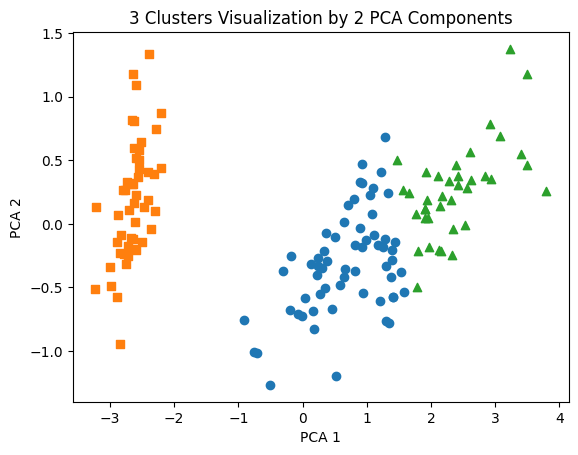

In [8]:
# 군집 값이 0,1,2 인 경우마다 별도의 인덱스로 추출
marker0_ind = irisDF[irisDF["cluster"]==0].index
marker1_ind = irisDF[irisDF["cluster"]==1].index
marker2_ind = irisDF[irisDF["cluster"]==2].index

# 군집 값 0,1,2에 해당하는 인덱스로 각 군집 레벨의 pca_x, pca_y 값 추출. o,s,^로 마커 표시
plt.scatter(x=irisDF.loc[marker0_ind,"pca_x"], y=irisDF.loc[marker0_ind, "pca_y"],marker="o")
plt.scatter(x=irisDF.loc[marker1_ind,"pca_x"], y=irisDF.loc[marker1_ind, "pca_y"],marker="s")
plt.scatter(x=irisDF.loc[marker2_ind,"pca_x"], y=irisDF.loc[marker2_ind, "pca_y"],marker="^")

plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("3 Clusters Visualization by 2 PCA Components")
plt.show()

### 군집화 알고리즘 생성을 위한 데이터 생성
- make_blobs(): 개별 군집의 중심점과 표준편차 제어기능 추가. 분류용도로 데이터 생성 가능,
- make_classification(): 노이즈를 포함한 데이터를 만드는 데 유용하게 사용가능.
분류용도로 데이터 생성 가능,
---
#### make_blobs의 호출 파라마터
- n_smaples : 생성할 총 데이터 개수. 디폴트는 100
- n_features : 데이터의 피처 개수. 시각화를 목표로 할 경우 2개로 설정해 보통 첫 번째 피처는 x좌표 두 번째 피처는 y좌표상에 표현한다.
- centers : int 값, 예를 들어 3으로 설정하면 군집의 개수를 나타냄. ndarray형태로 표현할 경우 개별 군집 중심점의 좌표를 의미한다.
- cluster_std : 생성될 군집 데이터의 표준 편차를 의미한다.만일 0.8을 지정 하면 군집 내에서 데이터가 표준편차 0.8을 가진 값으로 만들어 진다. [0.8 1.2 0.6]과 같은 형태로 표현되면 3개의 군집에서 각각의 표준편차로 군집이 형성된다.

In [9]:
# 총 200개의 레코드와 2개의 피처가 3개의 군집화 기반 분포도를 가진 피처 데이터 세트 X와, 동시에 3개의 군집화 값을 가진 타깃 데이터 세트 y가 반환
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

X,y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
#cluster_std는 작을수록 군집 중심에 데이터가 모여 있으며, 클수록 데이터가 퍼져 있음을 알 수 있음
print(X.shape, y.shape)

# y target 값의 분포를 확인
unique, counts =np.unique(y,return_counts=True)
print(unique, counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


In [10]:
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=["ftr1","ftr2"])
clusterDF["target"]=y
clusterDF.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


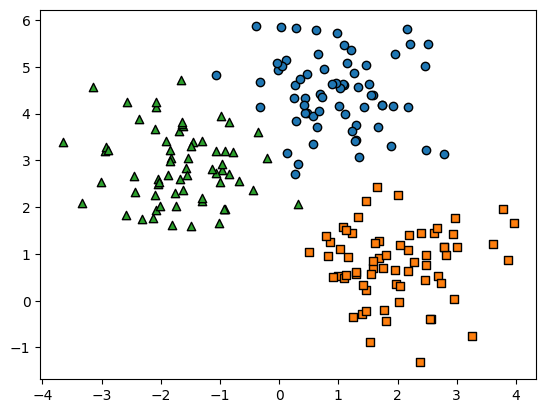

In [11]:
# 타깃값 0,1,2에 따랄 마커를 다르게 해서 산점도를 그려보면 다음과 같이 3개의 구분될 수 있는 군집 영역으로 피처 데이터 세트가 만들어졌음을 알 수 있음
target_list = np.unique(y)

#각 타깃별 산점도의 마커 값
markers = ["o","s","^","P","D","H","x"]

#3개의 군집 영역으로 구분한 데이터를 생성했으므로 target_list는 [0,1,2]
#target==0, target==1, target==2 로 scatter plot을 marker별로 생성.

for target in target_list:
    target_cluster = clusterDF[clusterDF["target"]==target]
    plt.scatter(x=target_cluster["ftr1"], y=target_cluster["ftr2"], edgecolor="k", marker=markers[target])
plt.show()

- 위는 make_blobs()를 통해 만들어진 feature 2개짜리 데이터세트이다.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


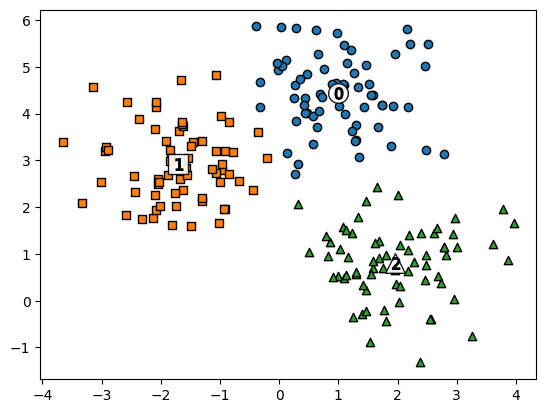

In [12]:
#KMeans 객체를 이용해 X 데이터를 K-Means 클러스터링 수행
kmeans = KMeans(n_clusters=3, init="k-means++", max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X)
clusterDF["Kmeans_label"] = cluster_labels

#cluster_centers_는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers = ["o","s","^","P","D","H","x"]

#군집된 label 유형별로 iteration하면서 marker 별로 scatter plot 수행
for label in unique_labels:
    label_cluster = clusterDF[clusterDF["Kmeans_label"]==label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster["ftr1"], y=label_cluster["ftr2"],edgecolor="k", marker=markers[label])
    #군집별 중심 위치 좌표 시각화
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color="white", alpha=0.9, edgecolor="k", marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color="k", edgecolor="k", marker="$%d$" % label)

plt.show()

- make_blobs()의 타깃과 kmeans_lable은 군집번호를 의미하므로 서로 다른 값으로 매핑될 수 있다. (그래서 산점도의 마커가 서로 다를 수 있다)

In [13]:
print(clusterDF.groupby("target")["Kmeans_label"].value_counts())

target  Kmeans_label
0       0               66
        1                1
1       2               67
2       1               65
        2                1
Name: Kmeans_label, dtype: int64


- 대부분 잘 매핑됨을 알 수 있다.

## 군집평가(Cluster Evaluation)

- 대부분의 군집화 데이터 세트는 앞의 붓꽃 데이터 세트가 비교할 만한 타깃 레이블을 가지고 있었던 것과 달리, 타깃 레이블을 가지고 있지 않는다.
- 군집화는 분류와 유사해 보일 수 있으나 성격이 많이 다르다
=> 데이터 내에 숨어 있는 별도의 그룹을 찾아서 의미를 부여하거나 동일한 분류 값에 속하더라도 그 안에서 더 세분화된 군집화를 추구하거나 서로 다른 분류 값의 데이터도 더 넓은 군집화 레벨화 등의 영역을 가지고 있음

### 군집화가 효율적으로 잘 됐는지 평가할 수 있는 지표 : 실루엣 분석
비지도학습의 특성상 어떠한 지표라도 정확하게 성능을 평가하기는 어렵다. 그럼에도 군집화의 성능을 평가하는 대표적인 방법으로는 실루엣 분석을 이용한다.



###실루엣 분석의 개요
- 실루엣 분석은 각 군집 간의 거리가 얼마나 효율적으로 분리돼 있는지를 나타냄
- 효율적으로 잘 분리됐다는 것은 다른 군집과의 거리는 떨어져 있고 동일 군집끼리의 데이터는 서로 가깝게 잘 뭉쳐 있다는 의미
-  군집화가 잘될수록 개별 군집은 비슷한 정도의 여유공간을 가지고 떨어져 있을 것

- **실루엣 분석**은 실루엣 계수를 기반으로 함
실루엣 계수는 개별 데이터가 가지는 군집화 지표
- 개별 데이터가 가지는 **실루엣 계수**는 해당 데이터가 같은 군집 내의 데이터와 얼마나 가깝게 군집화돼 있고, 다른 군집에 있는 데이터와는 얼마나 멀리 분리돼있는지를 나타내는 지표

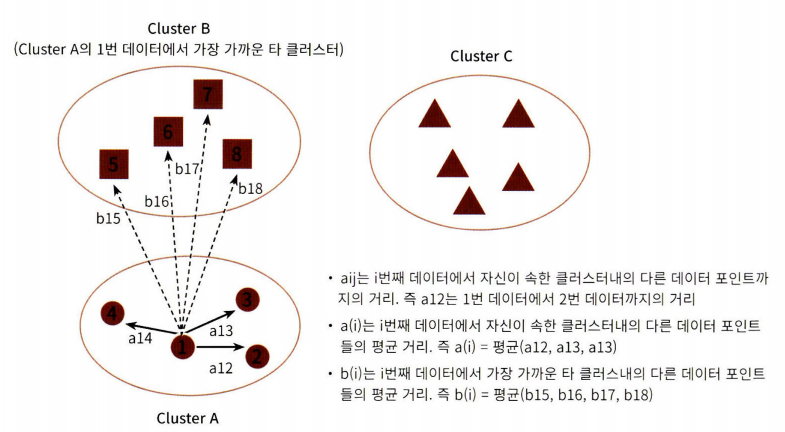

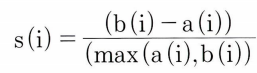

- **a(i)**: 특정 데이터 포인트의 실루엣 계수 값은 해당 데이터 포인트와 같은 군집 내에 있는 다른 데이터 포인트와의 거리를 평균한 값

- **b(i)**: 해당 데이터 포인트가 속하지 않은 군집 중 가장 가까운 군집과의 평균 거리
- **b(i)-a(i)** : 두 군집 간의 거리가 얼마나 떨어져 있는가의 값은 이며, 이 값을 정규화하기 위해 MAX(a(i),b(i)) 값으로 나눔

- 실루엣 계수는 -1에서 1 사이의 값을 가지며, 1로 가까워질수록 근처의 군집과 더 멀리 떨어져 있다는 것이다.
- 0에 가까울수록 근처의 군집과 가까워진다는 뜻이다.
- -값은 아예 다른 군집에 데이터 포인트가 할당됐음을 뜻함

### 붓꽃 데이터셋을 이용한 군집 평가
- sklearn,metrics모듈의 silhouette_samples()와 silhouette_score()를 이용

In [23]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

#실루엣 분석 평가 지표 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

iris = load_iris()
feature_names = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
kmeans = KMeans(n_clusters=3, init="k-means++", max_iter=300, random_state=0).fit(irisDF)
irisDF["cluster"] = kmeans.labels_

#iris의 모든 개별 데이터에 실루엣 계수 값을 구함
score_samples = silhouette_samples(iris.data, irisDF["cluster"])
print("silhouette_samples() return 값의 shape", score_samples.shape)

#irisDF에 실루엣 계수 칼럼 추가
irisDF["silhouette_coeff"] = score_samples

# 모든 데이터의 평균 실루엣 계수 값을 구함
average_score = silhouette_score(iris.data, irisDF["cluster"])
print("붓꽃 데이터 세트 Silhouette Analysis Score:{0:.3f}".format(average_score))

irisDF.head(3)

silhouette_samples() return 값의 shape (150,)
붓꽃 데이터 세트 Silhouette Analysis Score:0.553


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315


- 평균 실루엣 계수 값이 약 0.553이다. 1번군집의 경우 0.8 이상의 높은 실루엣 계수 값을 나타내다. 1번군집이 아닌 다른 군집의 경우 실루엣 계수값이 평균보다 낮기 때문이다.
- groupby를 통해 silhouette_coef칼럼의 평균값을 구한다

In [15]:
irisDF.groupby("cluster")["silhouette_coeff"].mean()

cluster
0    0.417320
1    0.798140
2    0.451105
Name: silhouette_coeff, dtype: float64

### 군집별 평균 실루엣 계수의 시각화를 통한 군집 개수 최적화 방법

- 전체 데이터의 평균 실루엣 계수 값이 높다고 해서 반드시 최적의 군집 개수로 군집화가 잘 됐다고 볼 수는 없음.
- 특정 군집 내의 실루엣 계수 값만 너무 높고, 다른 군집은 내부 데이터끼리의 거리가 너무 떨어져 있어 실루엣 계수 값이 낮아져도 평균적으로 높은 값을 가질 수 있음
-  개별 군집별로 적당히 분리된 거리를 유지하면서도 군집 내의 데이터가 서로 뭉쳐 있는 경우에 K-평균의 적절한 군집 개수가 설정됐다고 판단할 수 있음
---
#### make_blobs()함수를 통해 4개 군집 중심의 500개 2차원 데이터셋을 만들고 이를 k평균 군집화 시 최적의 군집개수를 시각화로 알아보자

In [16]:
def visualize_silhouette(cluster_lists, X_features):

    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산.
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현.
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


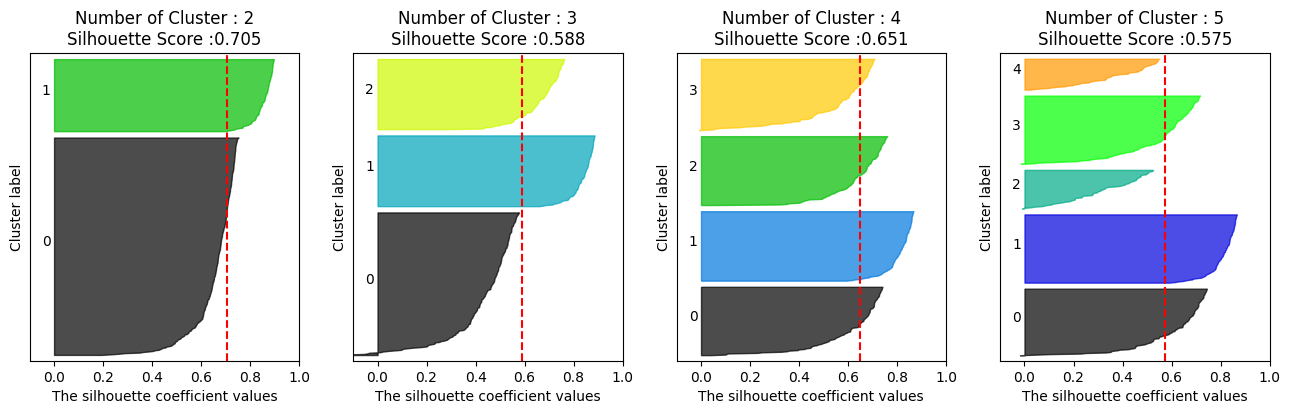

In [17]:
#make_blobs를 통해 군집화를 위한 4개의 군집 중심의 500개 2차원 데이터 세트 생성
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1,
                center_box=(-10.0, 10.0), shuffle=True, random_state=1)

#군집 개수가 2개, 3개, 4개, 5개일 때의 군집별 실루엣 계수 평균값을 시각화
visualize_silhouette([2,3,4,5],X)

- 4개의 군집일 때 최적이 됨을 알 수 있다.
---
#### 붓꽃 데이터를 통해 k-평균 시 최적의 군집 개수를 알아보자

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


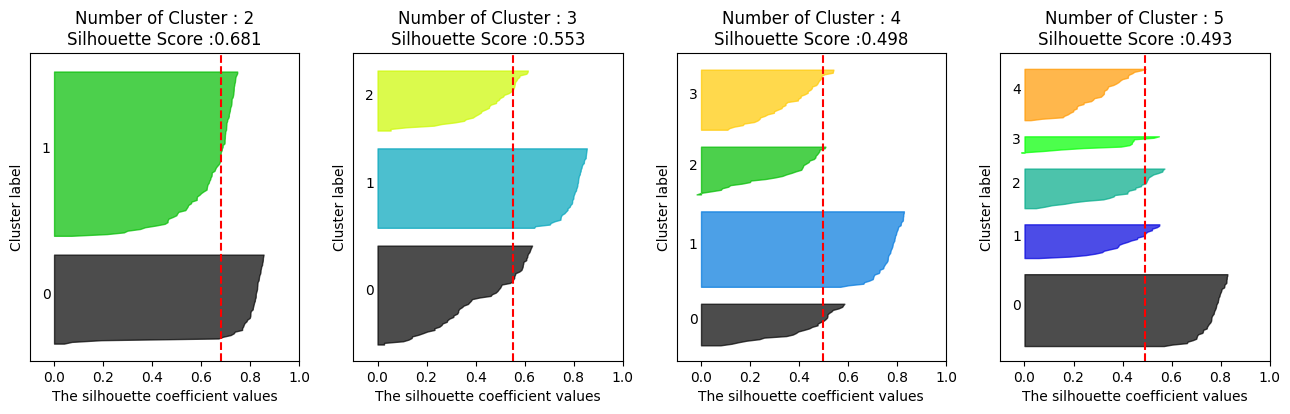

In [19]:
from sklearn.datasets import load_iris
iris = load_iris()
visualize_silhouette([2,3,4,5],iris.data)

- 군집개수가 2개일 때가 가장 좋다.
- 군집개수가 3개일 때는 평균 실루엣 계수값이 2개일 때보다 작다. 또한 1번군집과 다른 0번, 2번 군집과의 편차가 크다